# Elevator Movement Measurement Evaluation
### Imports and setup

In [425]:
include("./main.jl")
using .Main
series = 2
data = read_data_series(series)

DataSeries(Accelerometer(Jerk([0.142807866, 0.181227866, 0.219647866, 0.258067866, 0.296487866, 0.334907971, 0.373327971, 0.411747971, 0.450168075, 0.488588075  …  108.2986399, 108.3370614, 108.3754828, 108.4139043, 108.4523257, 108.4907471, 108.5291686, 108.56759, 108.6060115, 108.6444329], [0.005383491516, 0.003351211548, 0.003790855408, 0.006327629089, 0.0003032684326, 0.001331329346, 0.0001230239868, 0.001203536987, 0.00329875946, -0.0002689361572  …  -0.006175041199, -0.003529548645, -0.006646156311, -0.0117855072, -0.005414009094, -0.001704216003, -0.003826141357, 0.001987457275, -0.001502990723, -0.008091926575], "jerk_measurement"), Acceleration(nothing, nothing, ""), Velocity(nothing, nothing, ""), Position(nothing, nothing, "")), PressureSensor(Pressure([1.010264898, 2.01026495, 3.010266929, 4.010264898, 5.010265262, 6.010265158, 7.010264898, 8.010265731, 9.0102837, 10.0102775  …  98.43761196, 99.43761196, 100.437612, 101.437612, 102.437612, 103.437612, 104.437612, 105.437612

### Plot of Raw Data

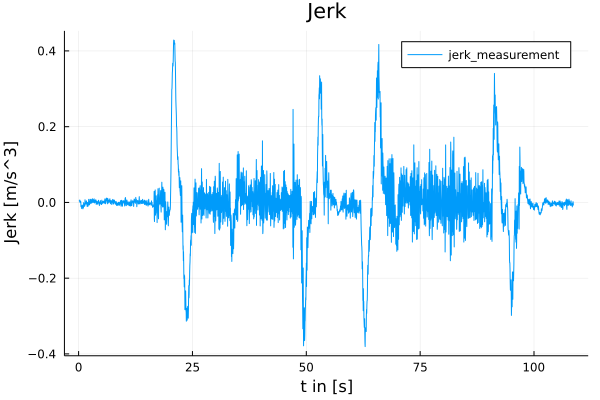

In [426]:
plot_stuff(data.accelerometer.jerk)
save_figure("fig_plot_raw$(series)")

### Zoom in on the first 10 seconds

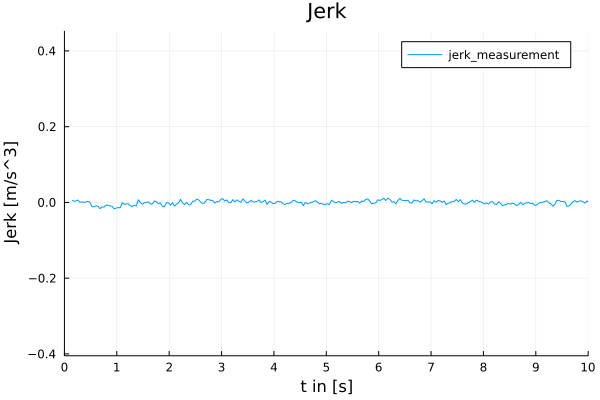

In [427]:
zoom_and_grid(0, 10)

### Cut off access data (initial shaking of the phone)

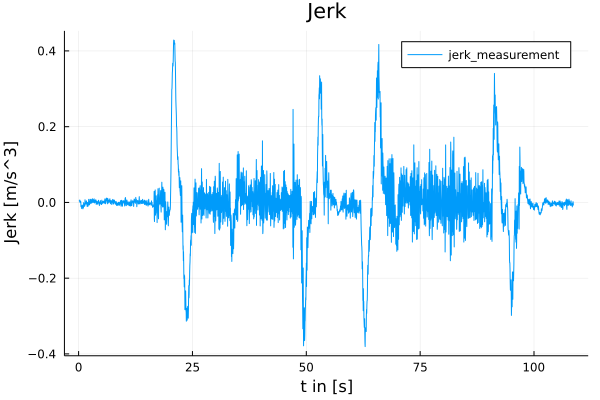

In [428]:
if series == 1
    cut(data, 0, 2)
end
plot_stuff(data.accelerometer.jerk)

### Evaluate sensor noise and apply correction

In [429]:
if series == 1
    offset = sensor_noise(data, (0, 20), (105, 110))
elseif series == 2
    offset = sensor_noise(data, (0, 15))
end
apply_offset(data, offset)
println("Offset: $offset")

Offset: -9.731902299255142e-5


### Integrate Data to get Acceleration, Velocity and Position

In [430]:
integrate(data)

### Display Results
#### Acceleration by Accelerometer

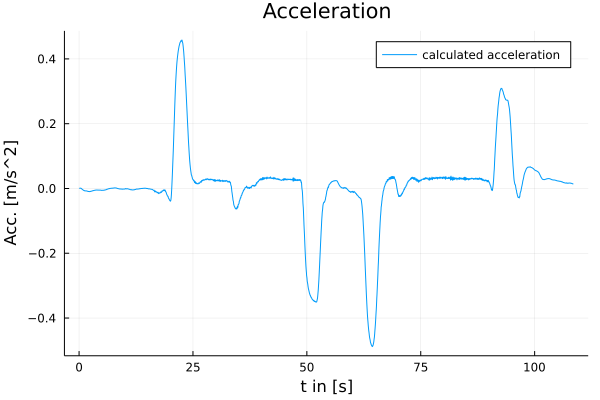

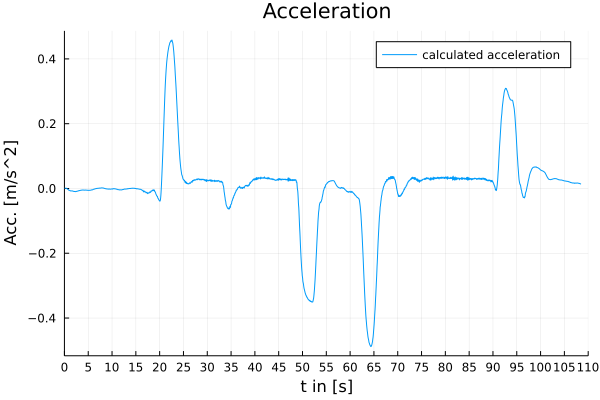

In [431]:
plot_stuff(data.accelerometer.acceleration)
save_figure("fig_plot_acc$(series)")
zoom_and_grid(0, 110, 110/5)

#### Velocity by Accelerometer

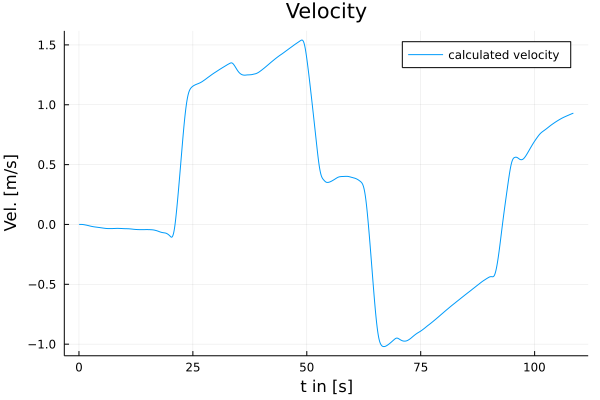

In [432]:
plot_stuff(data.accelerometer.velocity)
save_figure("fig_plot_vel$(series)")

#### Position by Accelerometer

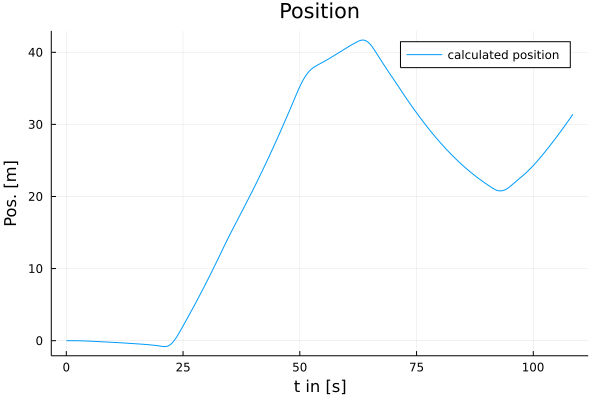

In [433]:
plot_stuff(data.accelerometer.position)

#### Pressure by Pressure Sensor

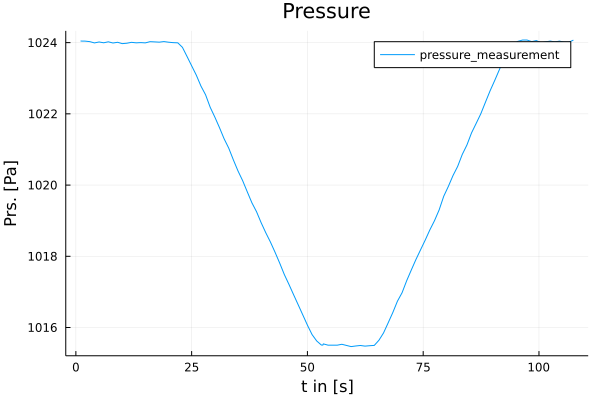

In [434]:
plot_stuff(data.pressure_sensor.pressure)
save_figure("fig_plot_pressure$(series)")

#### Velocity by Pressure Sensor

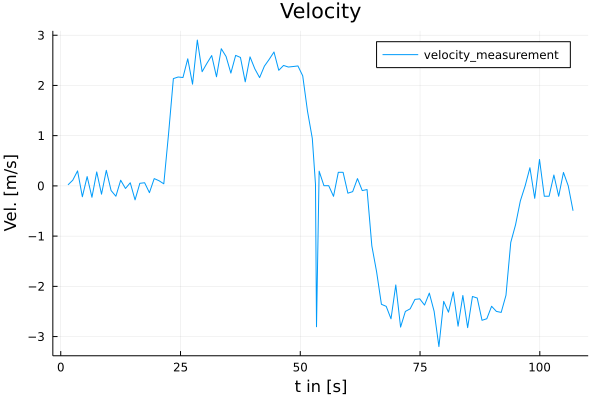

In [435]:
plot_stuff(data.pressure_sensor.velocity)

#### Position by Pressure Sensor

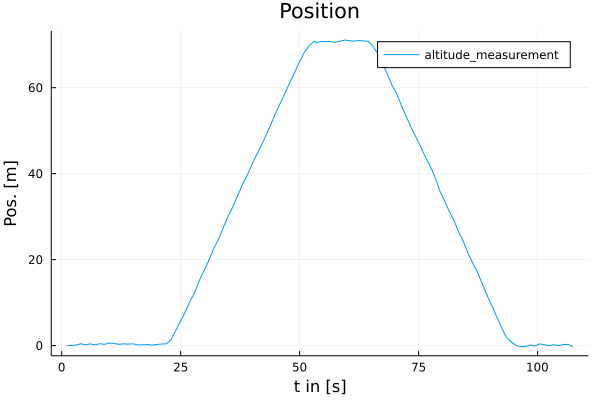

In [436]:
plot_stuff(data.pressure_sensor.position)

#### Velocity by Accelerometer and Pressure Sensor

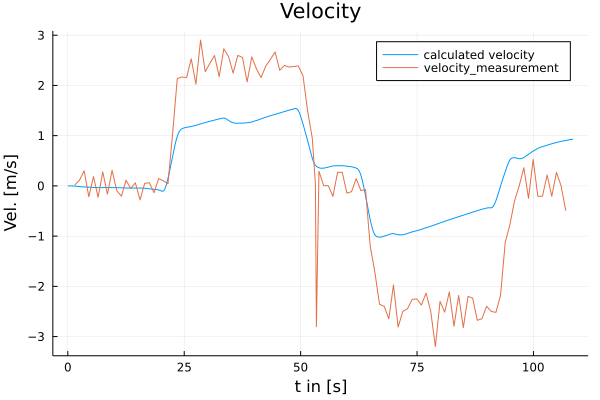

In [437]:
plot_stuff(data.accelerometer.velocity, data.pressure_sensor.velocity)
save_figure("fig_plot_vel_comp$(series)")

#### Position by Accelerometer and Pressure Sensor

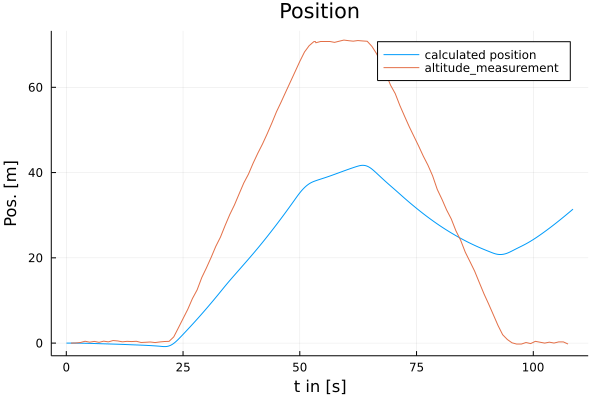

In [438]:
plot_stuff(data.accelerometer.position, data.pressure_sensor.position)
save_figure("fig_plot_pos_comp$(series)")

#### Acceleroemter: Jerk, Acceleration and Velocity

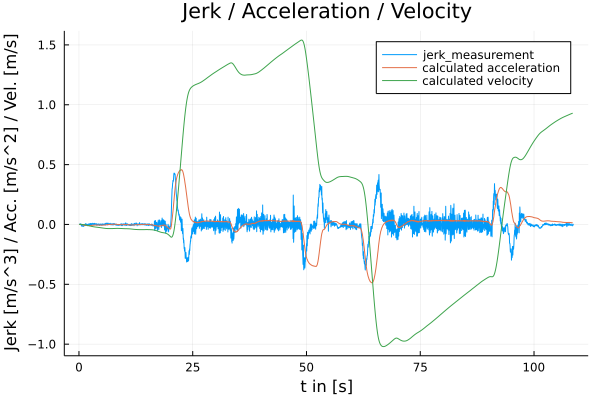

In [439]:
plot_stuff(data.accelerometer.jerk, data.accelerometer.acceleration, data.accelerometer.velocity)
save_figure("fig_plot_acc_vel_jerk$(series)")